In [14]:
import math
import numpy as np
from graphviz import Digraph
import pydot

In [ ]:
input = [1, 2, 3, 4]
[0 for _ in range(len(input))]

[0, 0, 0, 0]

In [53]:
# import numpy as np

# class Params:
#     """Class representing parameters to a mini Neural Net aka WizNet."""
    
#     activationFunc = {
#         "Sigmoid": lambda x: 1 / (1 + np.exp(-x)),
#         "ReLU": lambda x: np.maximum(0, x),
#         "Tanh": lambda x: np.tanh(x),
#     }
    
#     def __init__(self, value, grad=0, dtype=None):
#         """
#         Initializes a parameter.

#         Args:
#             value (float or list/np.ndarray): The value of the parameter.
#             grad (float or list/np.ndarray, optional): The gradient of the parameter. Default is 0.
#             dtype (str, optional): The type of the parameter. Default is None.
#         """
#         self.value = value
#         self.grad = grad
#         self.type = dtype
    
#     def __add__(self, biasParam):
#         """
#         Adds two parameters.

#         Args:
#             biasParam (Params): The bias parameter to add.

#         Returns:
#             Params: A new Params object with the summed value.
#         """
#         total = self.value + biasParam.value
#         return Params(total)
    
#     def __mul__(self, dataParam):
#         """
#         Multiplies the parameter value with another parameter using dot product.

#         Args:
#             dataParam (Params): The data parameter to multiply with.

#         Returns:
#             Params: A new Params object with the resulting value.
#         """
#         total = np.dot(self.value, dataParam.value)
#         return Params(total)
    
#     def __repr__(self):
#         """
#         Returns a string representation of the parameter.

#         Returns:
#             str: A string describing the parameter type, value, and gradient.
#         """
#         return f"Parameter type: {self.type}, Value: {self.value}, Grad: {self.grad}"

#     def weighted_sum(self, param1, param2):
#         """
#         Calculates the weighted sum of weights, data, and bias parameters.

#         Args:
#             param1 (Params): The first parameter (e.g., weights).
#             param2 (Params): The second parameter (e.g., data).

#         Returns:
#             Params: A new Params object with the weighted sum.
#         """
#         variables = {
#             self.type: self,
#             param1.type: param1,
#             param2.type: param2
#         }
        
#         weighted_sum = np.dot(variables['weight'].value, variables['data'].value) + variables['bias'].value
        
#         return Params(weighted_sum, dtype='data')
        

# class Weights(Params):
#     """Class representing weights input to a neuron / nn."""
    
#     def __init__(self, value):
#         """
#         Initializes weights parameters to specified value.

#         Args:
#             value (float or list/np.ndarray): The value of the weights.
#         """
#         super().__init__(value)
#         self.type = "weight"

# class Bias(Params):
#     """Class representing bias input to a neuron / nn."""
    
#     def __init__(self, value):
#         """
#         Initializes bias parameter to specified value.

#         Args:
#             value (float or list/np.ndarray): The value of the bias.
#         """
#         super().__init__(value)
#         self.type = "bias"

# class Data(Params):
#     """Class representing data input to a neuron / nn."""
    
#     def __init__(self, value):
#         """
#         Initializes data parameter to specified value.

#         Args:
#             value (float or list/np.ndarray): The initial value of the data.
#         """
#         super().__init__(value)  
#         self.type = "data"


In [74]:
import numpy as np
import graphviz
from graphviz import Digraph

class Params:
    """Class representing parameters to a mini Neural Net aka WizNet."""
    
    activationFunc = {
        "Sigmoid": lambda x: 1 / (1 + np.exp(-x)),
        "ReLU": lambda x: np.maximum(0, x),
        "Tanh": lambda x: np.tanh(x),
    }
    
    def __init__(self, value, grad=0, dtype=None):
        """
        Initializes a parameter.

        Args:
            value (float or list/np.ndarray): The value of the parameter.
            grad (float or list/np.ndarray, optional): The gradient of the parameter. Default is 0.
            dtype (str, optional): The type of the parameter. Default is None.
        """
        self.value = value
        self.grad = grad
        self.type = dtype
        self.id = str(id(self))  # Unique identifier for each Params object
        self._prev = set()
        self._op = None
        self.label = dtype

    def __add__(self, other):
        """
        Adds two parameters.

        Args:
            other (Params): The other parameter to add.

        Returns:
            Params (Data): A new Params object with the summed value.
        """
        result = Params(self.value + other.value, dtype='Data')
        result._prev = {self, other}
        result._op = '+'
        return result
    
    def __mul__(self, other):
        """
        Multiplies the parameter value with another parameter using dot product.

        Args:
            other (Params): The other parameter to multiply with.

        Returns:
            Params: A new Params object with the resulting value.
        """
        result = Params(np.dot(self.value, other.value), dtype='Product')
        result._prev = {self, other}
        result._op = '*'
        return result
    
    def __repr__(self):
        """
        Returns a string representation of the parameter.

        Returns:
            str: A string describing the parameter type, value, and gradient.
        """
        return f"Parameter type: {self.type}, Value: {self.value}, Grad: {self.grad}"

    def weighted_sum(self, weight, data, bias):
        """
        Calculates the weighted sum of weights, data, and bias parameters.

        Args:
            weight (Params): The weights parameter.
            data (Params): The data parameter.
            bias (Params): The bias parameter.

        Returns:
            Params: A new Params object with the weighted sum.
        """
        return weight * data + bias
    def backprop(self):
        if self._prev:
            if self._op == "+":
                for param in self._prev:
                    # local gradient is product of one and global gradient
                    param.grad = 1 * self.grad
            elif self._op == "*":
                product = 1
                for param in self._prev:
                    product *= param.value
                for param in self._prev:
                    param.grad = self.grad * (product / param.value)
            
            


class Weights(Params):
    """Class representing weights input to a neuron / nn."""
    
    def __init__(self, value):
        """
        Initializes weights parameters to specified value.

        Args:
            value (float or list/np.ndarray): The value of the weights.
        """
        super().__init__(value)
        self.type = "weight"
        self.label = "Weights"

class Bias(Params):
    """Class representing bias input to a neuron / nn."""
    
    def __init__(self, value):
        """
        Initializes bias parameter to specified value.

        Args:
            value (float or list/np.ndarray): The value of the bias.
        """
        super().__init__(value)
        self.type = "bias"
        self.label = "Bias"

class Data(Params):
    """Class representing data input to a neuron / nn."""
    
    def __init__(self, value):
        """
        Initializes data parameter to specified value.

        Args:
            value (float or list/np.ndarray): The initial value of the data.
        """
        super().__init__(value)  
        self.type = "data"
        self.label = "Data"

# Visualization code form Andrej Karpathy Micrograd
# Reference: https://github.com/karpathy/micrograd

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def format_value(value):
    if isinstance(value, np.ndarray):
        return np.array2string(value, precision=4, separator=',')
    else:
        return f"{value:.4f}"

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | value %s | grad %.4f }" % (n.label, format_value(n.value), n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot




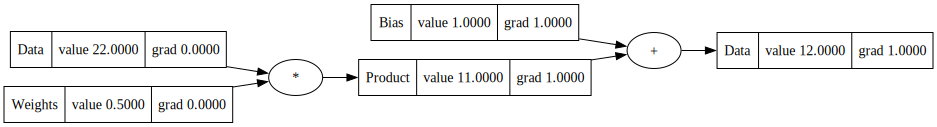

In [75]:
x = Data(22)
y = Weights(.5)
z = x*y
b = Bias(1)
ans = x*y + b
ans.grad = 1
ans.backprop()
draw_dot(ans)



In [69]:
print(ans._op)

+
